Data Sources:

https://osdatahub.os.uk/downloads/open/CodePointOpen?_ga=2.54203296.925140252.1618489825-1896150427.1618489825

http://www.nomisweb.co.uk/census/2011/ks101ew

In [1]:
from pathlib import Path
import pandas as pd
import swifter

import numpy as np

import matplotlib.pyplot as plt
from convertbng.util import convert_bng

In [11]:
df_population = pd.read_csv("Data/PC_sectors.csv")

#df_population = df_population.iloc[0:10]

In [12]:
df_population[df_population.geography.str.contains("TF9\s+4")]

,date,geography,geography code,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value
6585,2011,TF9 4,TF9 4,Total,4810,2389,2421,4745,65,101,5903.28,0.8


In [13]:
df_population.sort_values("Variable: All usual residents; measures: Value")

,date,geography,geography code,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value
2078,2011,EC1V 2,EC1V 2,Total,121,77,44,121,0,0,2.72,44.5
3519,2011,LS1 2,LS1 2,Total,126,71,55,120,6,3,32.10,3.9
98,2011,B3 2,B3 2,Total,133,78,55,133,0,0,29.12,4.6
6774,2011,TR25 0,TR25 0,Total,136,66,70,133,3,4,275.55,0.5
3738,2011,M3 2,M3 2,Total,143,80,63,143,0,3,3.19,44.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2011,E7 8,E7 8,Total,21075,11668,9407,21011,64,160,109.58,192.3
1338,2011,CR0 6,CR0 6,Total,21899,10870,11029,21785,114,205,220.04,99.5
3639,2011,LU3 1,LU3 1,Total,22499,11315,11184,22331,168,227,246.27,91.4
2718,2011,HU7 4,HU7 4,Total,23720,11630,12090,23434,286,96,766.95,30.9


In [14]:
df_population[df_population["Variable: All usual residents; measures: Value"] > 15000]

,date,geography,geography code,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value
39,2011,B10 9,B10 9,Total,17702,8800,8902,17691,11,99,163.87,108.0
42,2011,B11 3,B11 3,Total,17242,8608,8634,17226,16,119,225.79,76.4
49,2011,B13 9,B13 9,Total,15681,7957,7724,15390,291,186,276.45,56.7
78,2011,B23 5,B23 5,Total,15189,7232,7957,15041,148,96,284.40,53.4
80,2011,B23 7,B23 7,Total,16568,8081,8487,16465,103,109,327.27,50.6
...,...,...,...,...,...,...,...,...,...,...,...,...
7439,2011,WV12 5,WV12 5,Total,15236,7470,7766,15182,54,99,345.90,44.0
7609,2011,CF24 4,CF24 4,Total,20071,10122,9949,18675,1396,162,164.89,121.7
7643,2011,CF39 8,CF39 8,Total,15268,7433,7835,15116,152,109,3059.89,5.0
7671,2011,CF5 4,CF5 4,Total,16368,7647,8721,16235,133,86,361.68,45.3


In [15]:
def postcode_shorten(postcode):
    return postcode[0:5]

header = ["Postcode", "Positional_quality_indicator", "Eastings", "Northings", "Country_code", "NHS_regional_HA_code", "NHS_HA_code", "Admin_county_code", "Admin_district_code", "Admin_ward_code"]


paths = Path("Data/Data/CSV").glob("*")

df_position = pd.concat((pd.read_csv(p, header=None, names=header) for p in paths))

df_position = df_position[["Postcode", "Eastings", "Northings"]]
df_position["_PC"] = df_position["Postcode"].map(postcode_shorten)
df_position

,Postcode,Eastings,Northings,_PC
0,AB101AB,394235,806529,AB101
1,AB101AF,394181,806429,AB101
2,AB101AG,394230,806469,AB101
3,AB101AH,394371,806359,AB101
4,AB101AL,394296,806581,AB101
...,...,...,...,...
646,ZE3 9JU,438872,1111807,ZE3 9
647,ZE3 9JW,438975,1110038,ZE3 9
648,ZE3 9JX,438872,1110219,ZE3 9
649,ZE3 9JY,438498,1112029,ZE3 9


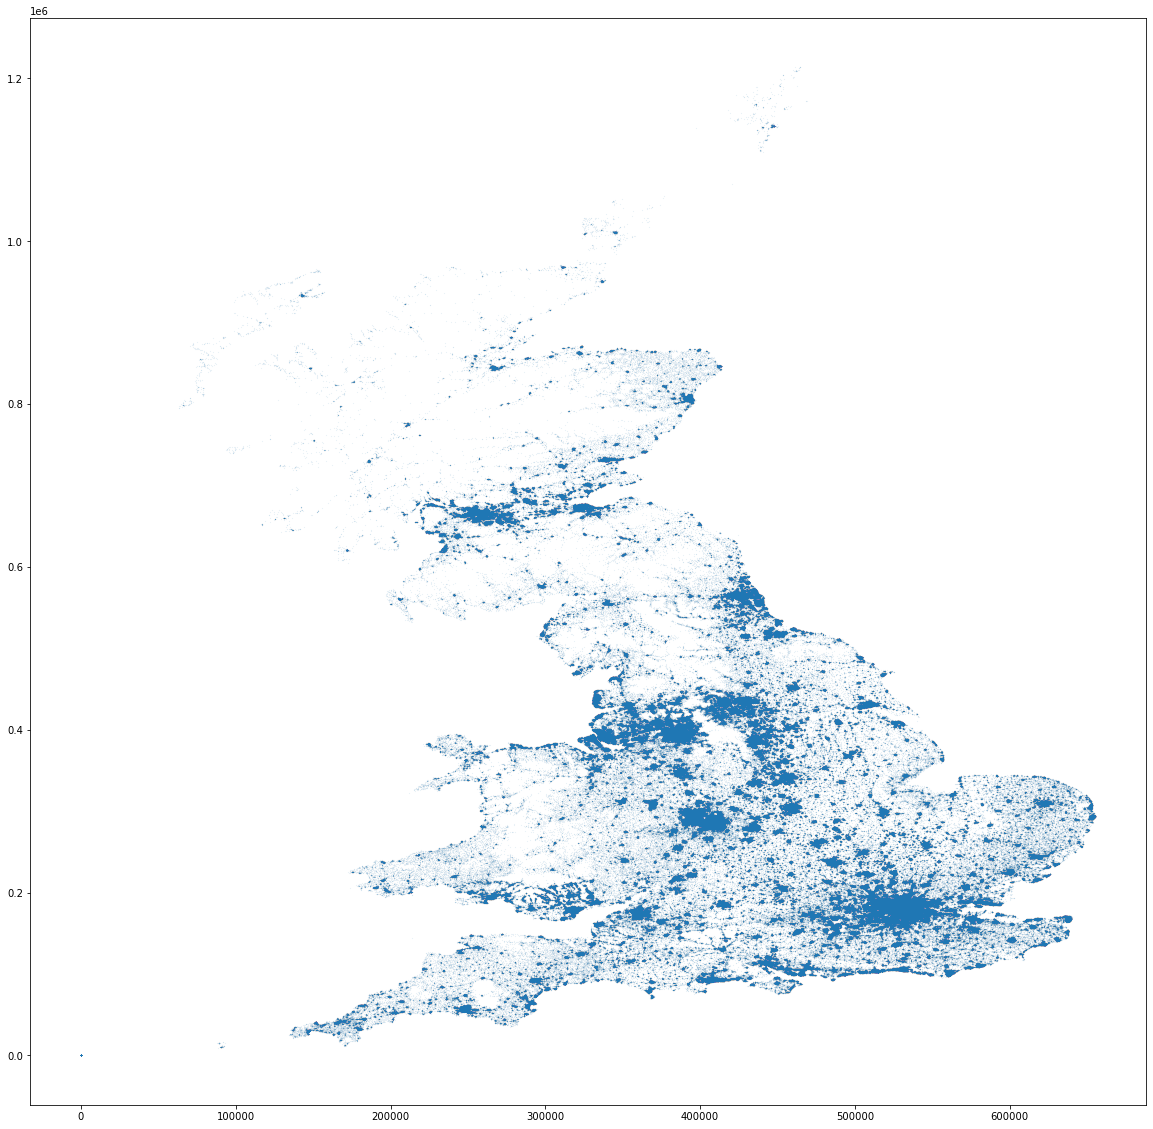

In [16]:
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(df_position.Eastings, df_position.Northings, s=0.001)

In [17]:
df_position[df_position.Postcode.str.contains("AL1 1")]

,Postcode,Eastings,Northings,_PC
0,AL1 1AG,515487,206498,AL1 1
1,AL1 1AJ,515491,206410,AL1 1
2,AL1 1AR,516270,205897,AL1 1
3,AL1 1AS,515005,206908,AL1 1
4,AL1 1AT,516131,206148,AL1 1
...,...,...,...,...
187,AL1 1WZ,517321,206803,AL1 1
188,AL1 1XB,516270,205372,AL1 1
189,AL1 1XL,514744,206738,AL1 1
190,AL1 1XT,514611,206765,AL1 1


Take population to be at center of average postcodes or devide population by postcode and use that?

In [18]:
def avergage_postion_of_sector(sector, df=df_position):
    sector = sector[0:4] + sector[-1]
    df = df[df._PC == sector]
    
    #print(df)
    #plt.scatter(df.Eastings, df.Northings, s=3)
    #plt.scatter(df.Eastings.mean(), df.Northings.mean(), s=4, c="red")
    #plt.show()
    
    return np.mean(df.Eastings), np.mean(df.Northings)

avergage_postion_of_sector("AL100")

(522393.358649789, 209029.86919831223)

In [19]:
df_population["Eastings"],  df_population["Northings"] = zip(*df_population["geography"].swifter.apply(avergage_postion_of_sector))

Pandas Apply:   0%|          | 0/8035 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
df_population

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(df_population.Eastings, df_population.Northings, s=df_population["Variable: All usual residents; measures: Value"]/4000, c=df_population["Variable: All usual residents; measures: Value"], )

In [ ]:
df_2 = df_population
df_2 = df_2.sort_values("Variable: All usual residents; measures: Value", ascending=False).reset_index(drop=True)

pop_name = "Variable: All usual residents; measures: Value"

df_2["Station"] = False

#print(df_2)


for min_distance in [1000, 2000, 3000, 5000]:
    for i in df_2.index:

        try:
            #print(i, ".", end="")
            n = df_2.at[i,"Northings"]
            e = df_2.at[i,"Eastings"]

            #print(i, n, e)
            #print(n - min_distance, n + min_distance)
            #print(e - min_distance, e + min_distance)


            #print(list(df_2.Station != True))
            #print(list(df_2.Northings.between(n - min_distance, n + min_distance)))
            #print(list(df_2.Eastings.between(e - min_distance, e + min_distance)))
            #print(list(df_2.index != i))

            selection = ((df_2.Station != True) & (df_2.Northings.between(n - min_distance, n + min_distance)) & (df_2.Eastings.between(e - min_distance, e + min_distance)) & (df_2.index != i))
            #print(list(selection))
            #print(len(df_2[selection].geography))

            #print(df_2.at[i,pop_name])
            #print(df_2[selection][pop_name].sum())
            df_2.at[i,pop_name] += df_2[selection][pop_name].sum()
            #print(df_2.at[i,pop_name])

            #print(df_2[["geography", pop_name]])

            df_2.drop(df_2[selection].index, inplace=True)

            #print(df_2[["geography", pop_name]])

            if df_2.at[i, pop_name] > 10000:
                df_2.at[i,"Station"] = True

            #fig, ax = plt.subplots(figsize=(20,20))

            #ax.axvline(e - min_distance)
            #ax.axvline(e + min_distance)

            #ax.axhline(n - min_distance)
            #ax.axhline(n + min_distance)

            #ax.scatter(n, e, zorder=1, c="Red", s=2)


            #ax.scatter(df_2[df_2.Station == False].Eastings, df_2[df_2.Station == False].Northings, c='C2', s=df_2[df_2.Station == False][pop_name]/4000)
            #ax.scatter(df_2[df_2.Station == True].Eastings, df_2[df_2.Station == True].Northings, c='C0', s=df_2[df_2.Station == True][pop_name]/4000, label="Station")
            #ax.legend()
            #plt.show()

            #print("complete")

        except KeyError:
            pass #print(f"{i} no longer exists")
        
    fig, ax = plt.subplots(figsize=(20,20))

    ax.scatter(df_2[df_2.Station == True].Eastings, df_2[df_2.Station == True].Northings, c='C0', s=df_2[df_2.Station == True]["Variable: All usual residents; measures: Value"]/4000, label="Station")
    ax.scatter(df_2[df_2.Station == False].Eastings, df_2[df_2.Station == False].Northings, c='C2', s=df_2[df_2.Station == False]["Variable: All usual residents; measures: Value"]/4000)
    ax.legend()




In [ ]:
fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(df_2[df_2.Station == True].Eastings, df_2[df_2.Station == True].Northings, c='C0', s=df_2[df_2.Station == True]["Variable: All usual residents; measures: Value"]/4000, label="Station")
ax.scatter(df_2[df_2.Station == False].Eastings, df_2[df_2.Station == False].Northings, c='C2', s=df_2[df_2.Station == False]["Variable: All usual residents; measures: Value"]/4000)
ax.legend()


# df_stations = pd.read_csv("Data/GB stations.csv")
# df_stations.columns

# df_stations["Eastings"], df_stations["Northings"] = convert_bng(df_stations.Longitude, df_stations.Latitude)

# ax.scatter(df_stations["Eastings"], df_stations["Northings"], alpha=0.2) #s=df_stations["Entries and exits 2020"]/100000, c="None", edgecolors="Red")

# plt.show(fig)

ax.scatter(df_stations["Longitude"], df_stations["Latitude"], s=df_stations["Entries and exits 2020"]/100000, c="None", edgecolors="Red")


uk = gpd.read_file("Data/bdline_gpkg_gb/data/bdline_gb.gpkg", )
uk = uk.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(20,20))

ax = uk.plot(ax=ax, color='white', edgecolor='black')

In [ ]:
ax.set_xlim(450000, 600000)
ax.set_ylim(100000, 250000)

fig

In [ ]:
df_2